In [1]:
import pandas as pd
import seaborn as sns  # it was reference to the west wing
import matplotlib.pyplot as plt  #seaborn is based on matplotlib
sns.set(color_codes = True) # adds a nice background to a graph
%matplotlib inline

# tells pythonto actually display the graphs.


In [2]:
auto = pd.read_csv('Automobile.csv')

In [3]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Plotting univariate distribution

The most convinient way to take a quick look at univariate distribution in seaborn is the displot() function. By default this will draw a histogram and fit a kernel density estimate (KDE).

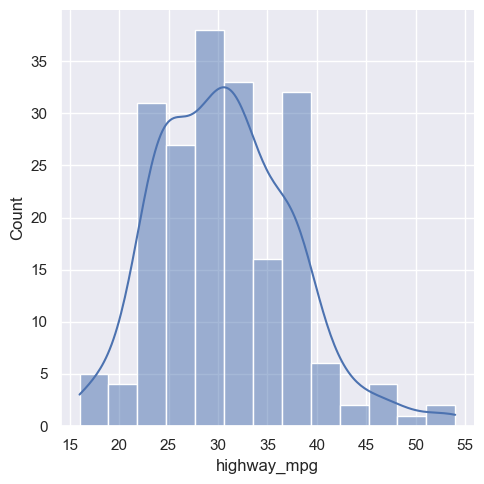

In [4]:
# syntax:-> sns.displot(data_set["category"]);

sns.displot(auto["highway_mpg"], kde = True);

# the nice curve on the displot(histogram) is said to be (KDE)
# histogram(displot) is very good for one dimension (1-D) dataset.

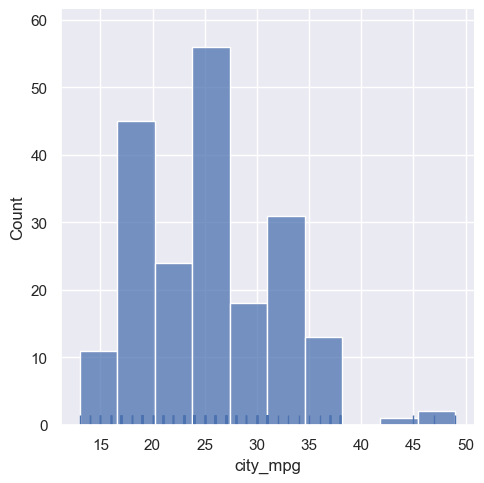

In [5]:
# we can turn the kde off and put a tick mark along the x-axis for every data point with rug

sns.displot(auto["city_mpg"], kde = False, rug = True);

## Plotting bivariate Distribution

It can also be useful to visualize a relationship between two variable. The easiest way to do so in saeborn is to use the jointplot() function, which creates a scatterplot of the two variables along with the histograms of each next toappropriate axes.

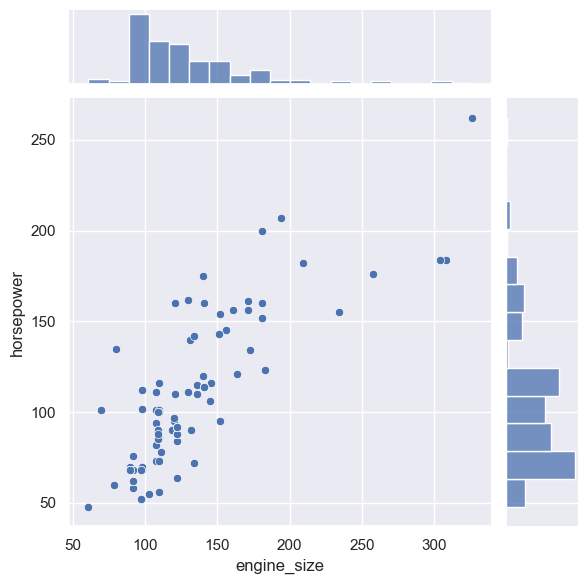

In [6]:
sns.jointplot(data = auto, x = "engine_size", y = "horsepower" );

## Hex bin plots

1. hex plot does essentially a 2-D histogram wher hight is based on the color instead of a height of a bar so here we seprate the x and y axis into a bunch of hexagon. That are touching.

2. we can make a hex bin plot thats break the 2-D area into hexagons and the number of points in each hexagon determines the color

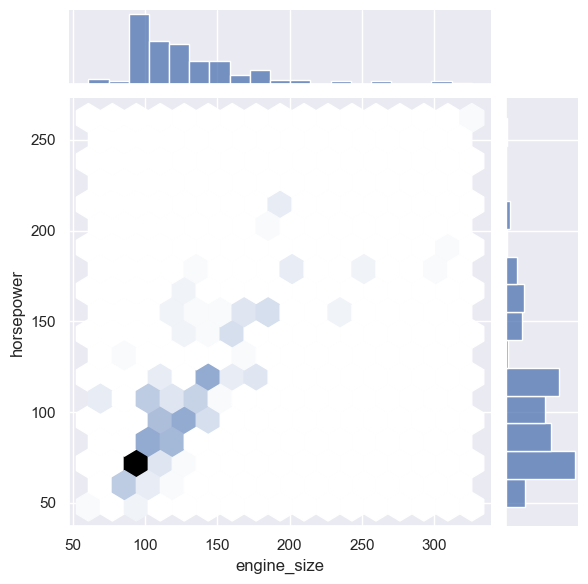

In [7]:
sns.jointplot(data = auto, x = "engine_size", y = "horsepower", kind = 'hex');

## kernel density estimation

we can make a 2-D estimation of the density also

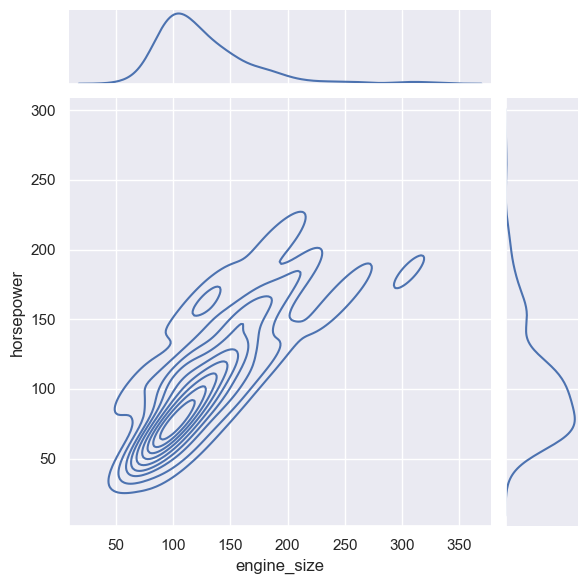

In [8]:
sns.jointplot(data = auto, x = "engine_size", y = "horsepower", kind = 'kde');

## Visualizing pairwise relationship in a dataset 

T plot multiple pairewise scatterplots in a dataset we can use the pairplot function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. It also draws the histogram of each variable on the diagonal axes:

Be carefull about the toggle scrolling in the cell menu!!

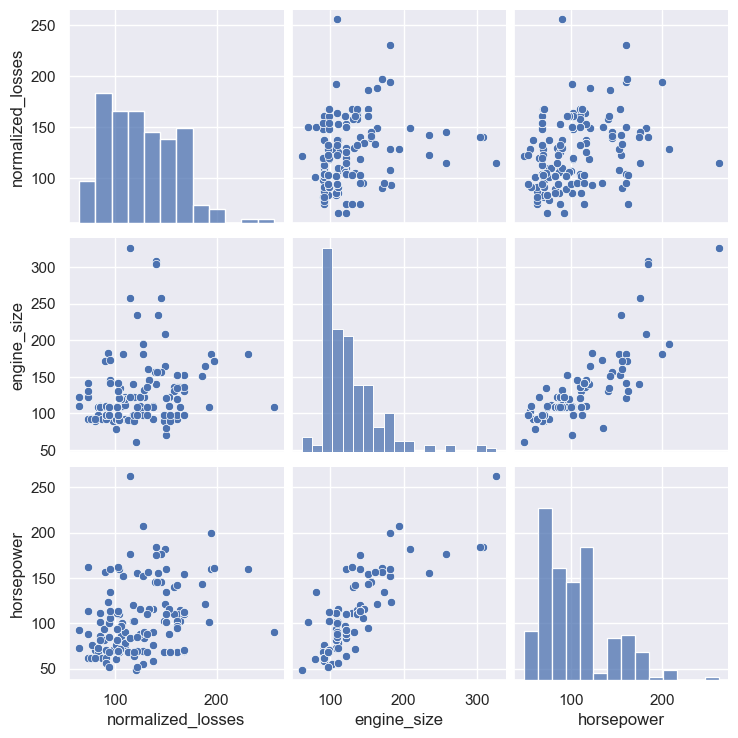

In [9]:
sns.pairplot(auto[["normalized_losses", "engine_size", "horsepower"]]);

## Plotting with the categorical data

in a strip plot, the scatter plot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions(only along the categorical axes) using "jitter"


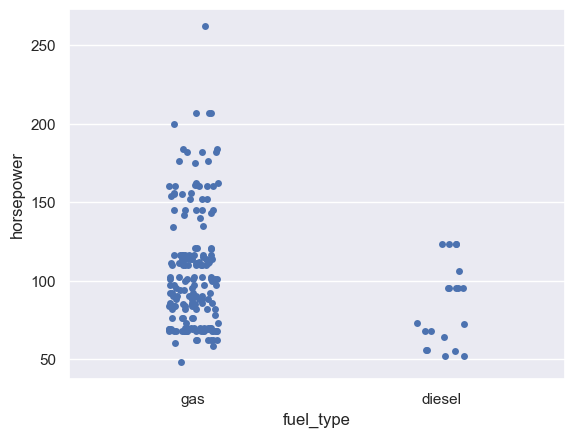

In [10]:
# syntax:-> sns.stripplot(data=tips, x="total_bill", y="day");
sns.stripplot(data=auto, x = "fuel_type", y = "horsepower", jitter = True);

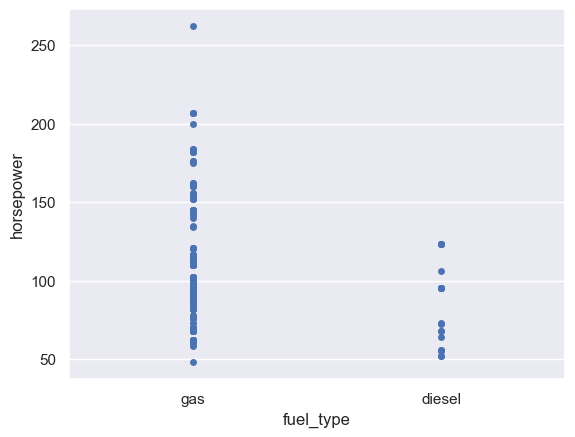

In [11]:
sns.stripplot(data=auto, x = "fuel_type", y = "horsepower", jitter = False);

A different approach would be to use a function swarmplot(), which positions each scatterplot point on categorical axes and avoids overlapping points:

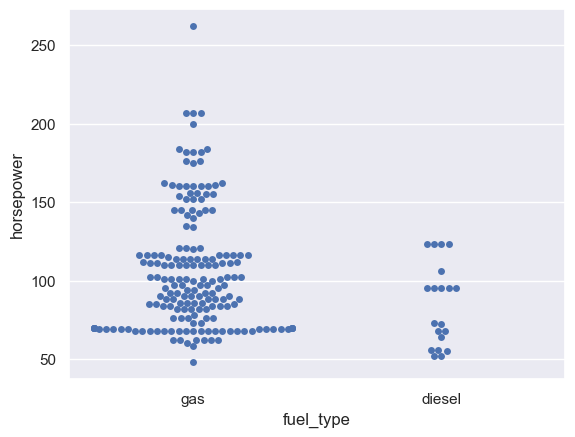

In [12]:
sns.swarmplot(data = auto, x = "fuel_type", y = "horsepower");

## Boxplots
Another common graph is a boxplot(). This kind of plot shows the three quartile values of the distribution along with the extream values. The "whiskers" extended to points that lie within 1.5 IQRs of lower and upper quartile, and observation that fall outside this range are displayed independently. 

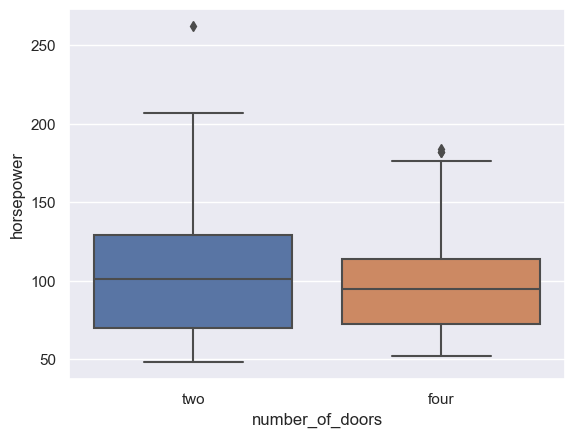

In [13]:
sns.boxplot(data = auto, x = "number_of_doors", y = "horsepower");

In [14]:
# median is a line in no of doors (2) is around 100
# median is a line in no of doors (4) is around 90

# the median is the value such that half of the cars' horsepower are above that value, 
# and half of the cars' horsepower are below the value

# so it can be said that the 50% cars have horsepower more than 100 and 
# 50% cars have horsepower less than 100 if we have a two door car

# 50% of four door cars have more than a 90 horsepower,
#  and 50% of four door cars have less then 90 horsepower

#  25% of 2 door cars have more than 130 horsepower 
# {3rd quartile} and 75% of 2 doorr cars has less than 130 horsepower

# 3rd quartile of 4 door cars is around 110. 75% of 4 door cars have less than 110 horsepower
# and 25% of 4 door cars have more than 110 horsepower.

# {1st quartile} 25 % of 2 door cars have less than 75 horsepower
# {1st quartile} 25 % of 4 door cars also have less than 75 horsepower

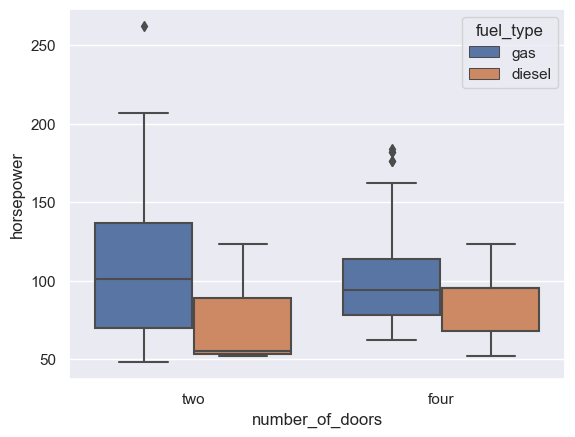

In [15]:
sns.boxplot(data = auto, x = "number_of_doors", y = "horsepower", hue = auto["fuel_type"]);

## Barplots

we can plot the mean of the dataset, seperated in categories using the barplot() function. When there are multiple observations in each category, it uses bootstrapping to compute a confidence interval around the estimates and plots that using error bars.:

bar plots start at 0, which can sometimes be practical if zero is a number you want to compare to


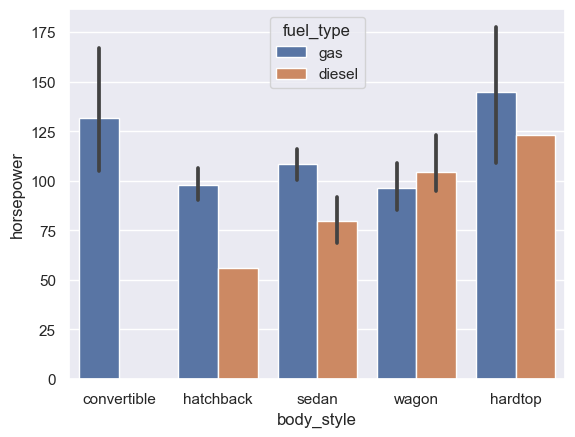

In [16]:
sns.barplot(data = auto, x = "body_style", y = "horsepower", hue = auto["fuel_type"]);

a special case for the bar plot is what when you want to show the number of observations in each category rather than computing the mean of a second variable, This is similar to a histogram over a categorical, rather than quantitive, variable in seaborn it is easy to do so with the countplo() function:

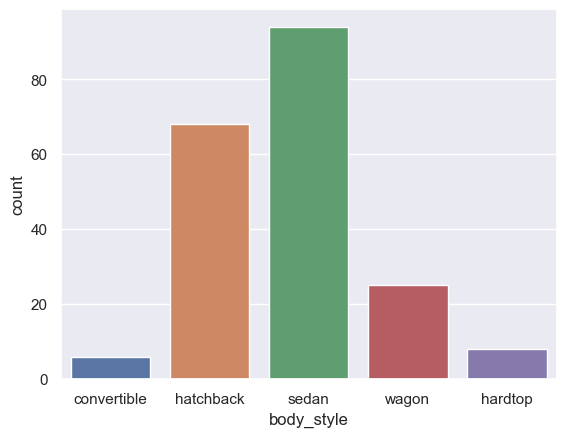

In [17]:
# sns.countplot(data = auto, x = ["body_style"]);
sns.countplot(x = 'body_style', data = auto );

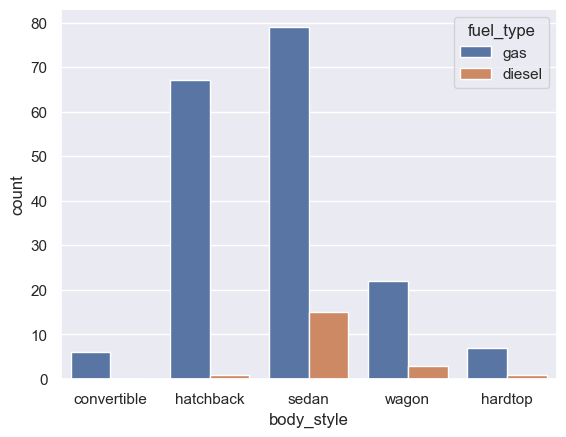

In [18]:
sns.countplot(x = 'body_style', data = auto, hue = auto["fuel_type"] );

## Point plots 

An alternative style for visualizing the same information is offered by the pointplot() function.This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plot the poit estimate and confidence interval. Additionally point plots connects points from the same hue catagory. This makes it easy to see how the main relationship is changing as afunction of second variable, because your eyes are quite good at picking up on differences of slopes: 



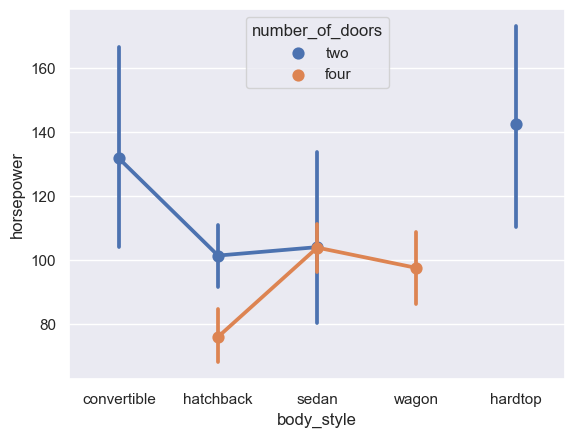

In [19]:
# sns.pointplot(x = ["body_style"], y = ["horsepower"], data = auto, hue = auto["number_of_doors"]);

sns.pointplot(data = auto, x = "body_style", y = "horsepower", hue = auto["number_of_doors"]);

## Drawing multipannel categorical plot

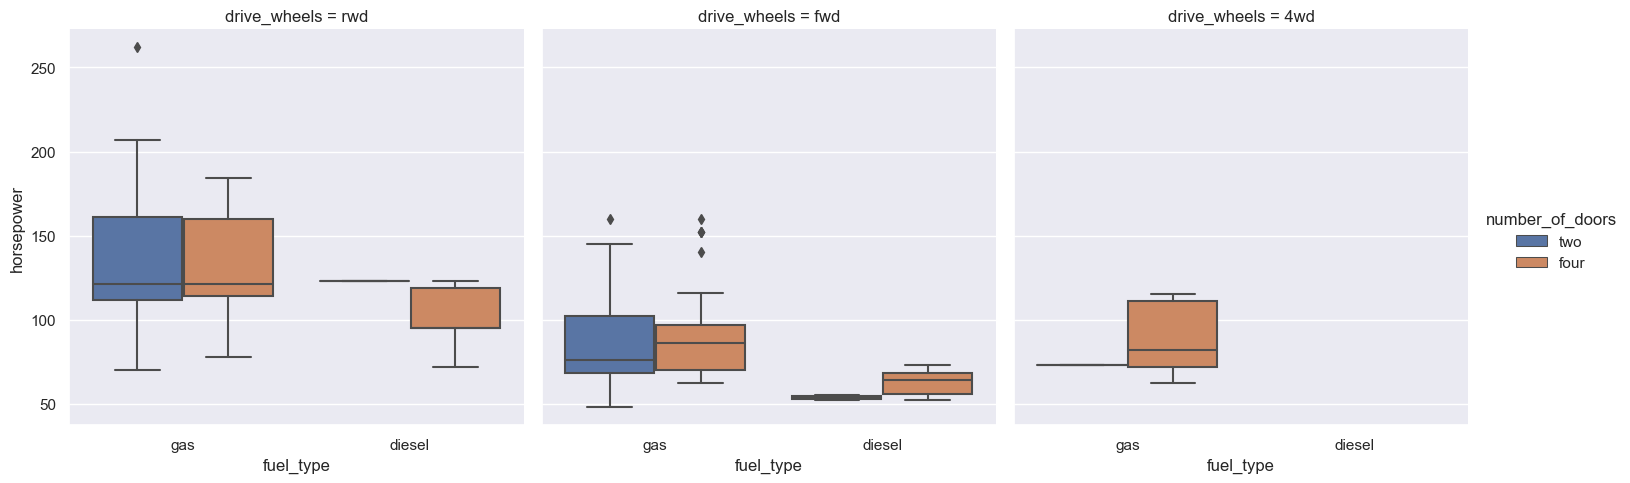

In [21]:
sns.catplot(x = "fuel_type",
           y = "horsepower",
           hue = "number_of_doors",
           col = "drive_wheels",
           data = auto,
            kind = "box")

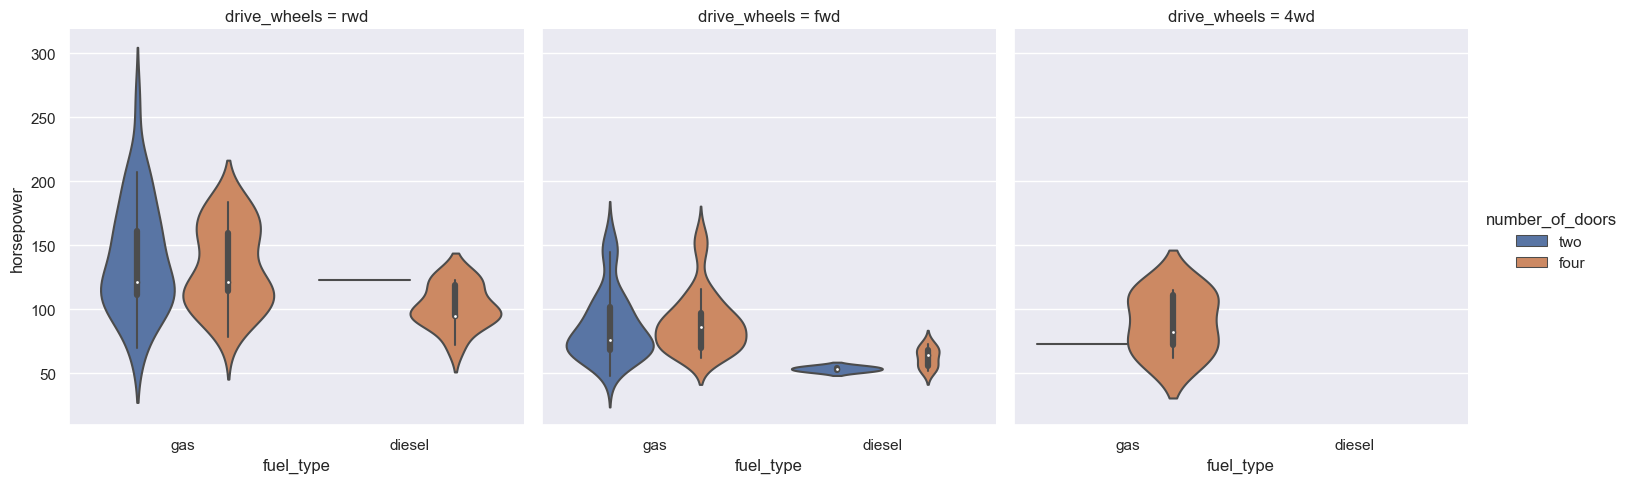

In [22]:
sns.catplot(x = "fuel_type",
           y = "horsepower",
           hue = "number_of_doors",
           col = "drive_wheels",
           data = auto,
            kind = "violin")

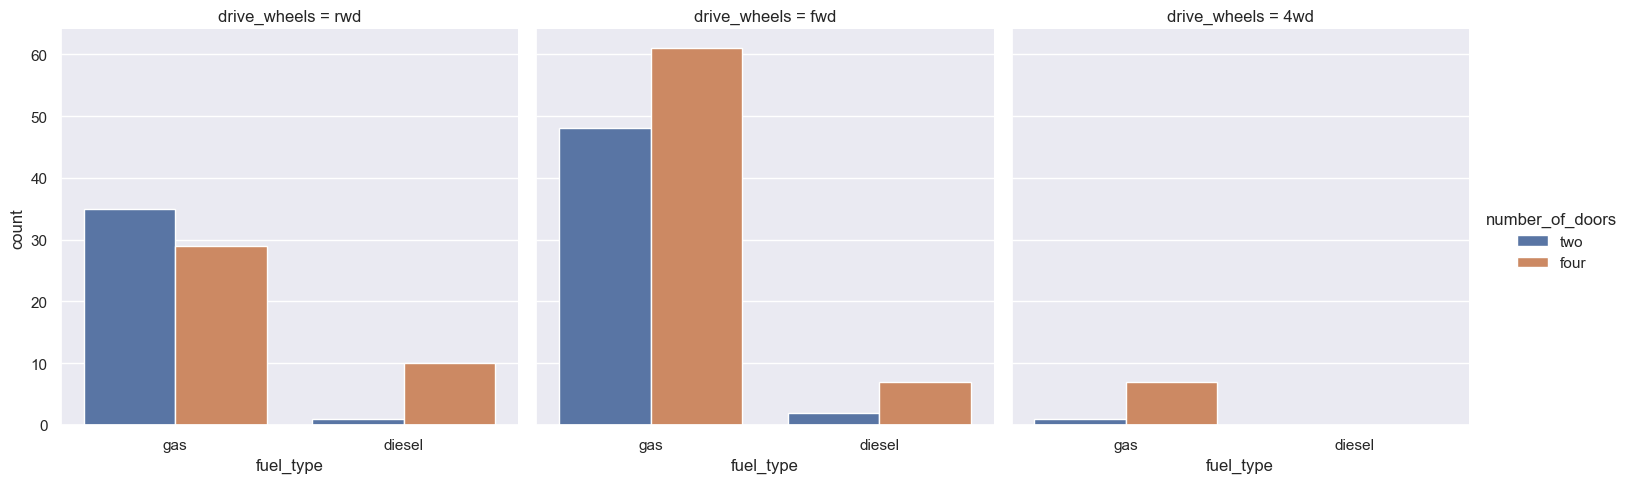

In [24]:
sns.catplot(x = "fuel_type",
#            y = "horsepower",
           hue = "number_of_doors",
           col = "drive_wheels",
           data = auto,
            kind = "count")

In [25]:
sns.catplot(x = "fuel_type",
           y = "horsepower",
           hue = "number_of_doors",
           col = "drive_wheels",
           data = auto,
#            kind = "count")


ValueError: Either `x` or `y` must be None for kind='count'

## Various type of kind input : {point, bar, count, box, violin, strip, }

# Functions to draw linear regression models. 

lmplot() {linear model plot} is one of the most widely used function to quickly plot the linear relationship between 2 variables. 

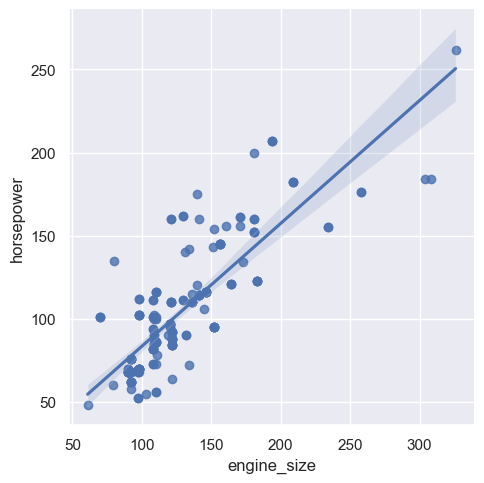

In [29]:
sns.lmplot(x = "engine_size", y = "horsepower", data = auto );

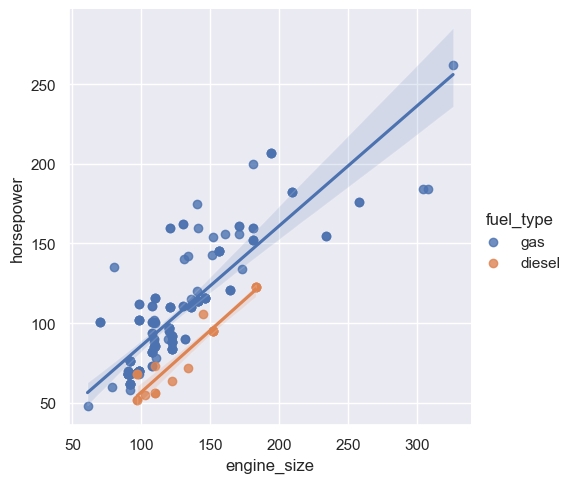

In [31]:
sns.lmplot(x = "engine_size", y = "horsepower", hue = "fuel_type", data = auto);

## The extended content on python :

1. line plot
2. scatterplot.
3. Barplot.
4. histogram (Univariet plot)
5. boxplot and violin plot
6. Pie chart and doughnut chart

In [34]:
import numpy as np
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [35]:
y = 2 * x
y

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

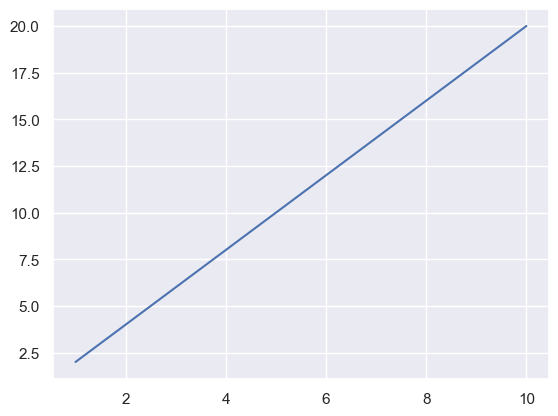

In [36]:
plt.plot(x, y)
plt.show()

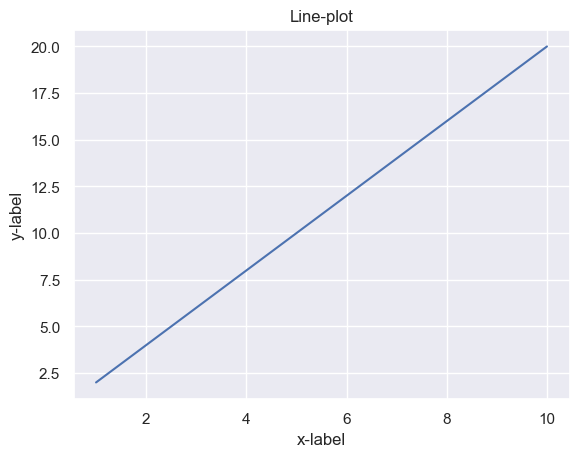

In [37]:
plt.plot(x,y)
plt.title("Line-plot")
plt.xlabel("x-label")
plt.ylabel("y-label")
plt.show()

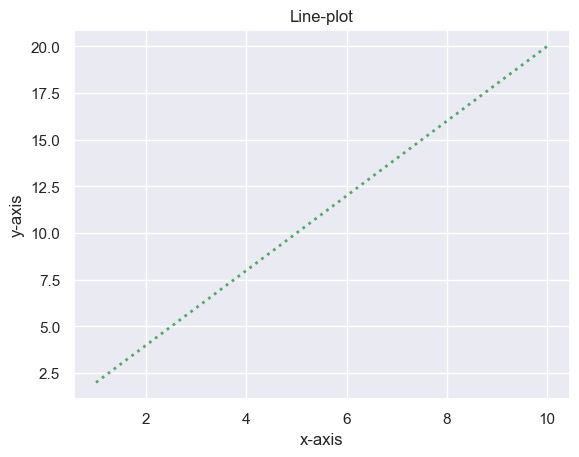

In [41]:
plt.plot(x,y,color = "g", linestyle = ':', linewidth = 2)
plt.title("Line-plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.show()

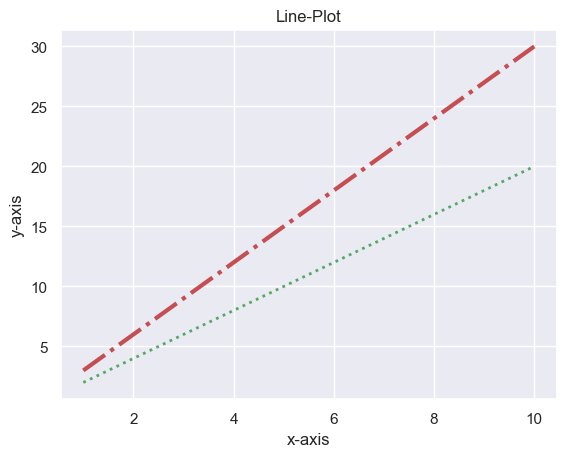

In [48]:
# if we want to plot more than one line in a line plot 

x = np.arange(1, 11)
y1 = x * 2
y2 = x * 3

plt.plot(x,y1,color = "g", linestyle = ":", linewidth = 2)
plt.plot(x,y2,color = "r", linestyle = '-.', linewidth = 3)
plt.title("Line-Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()

# Adding subplots

So for that we have to usethe subplot method. And this takes in the 2 parameters. 
So 1st parameter is the row index, next is the column index.
and then we have where our image is going to plot or the subplot number.

Ex : plt.subplot(1,2,1)
here as we see we are aking our first plot 1,2 here means that i would have 2 sub plots and those 2 subplots will be in 2 different columns . And we will get output as column1 and column2
column1 we will have the 1st subplot 
and, in column2 we will get the 2nd subplot. 


The basic arguments are:

subplot(nrows, ncols, index).

where nrows is the number of rows of plots,

ncols is the number of columns of plots, 

and index is the plot number when counting across the grid of plots from left to right, top to bottom.

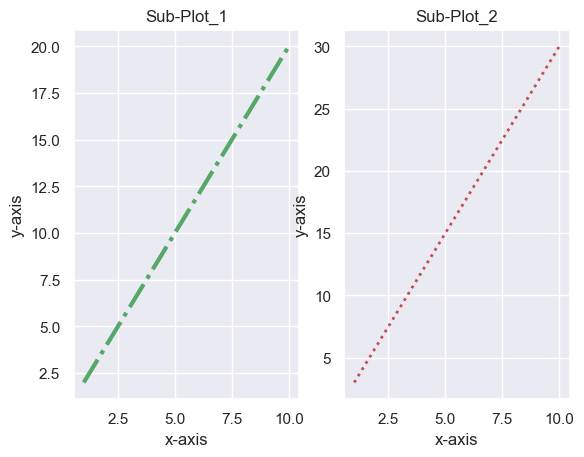

In [52]:
plt.subplot(1,2,1)
plt.plot(x, y1, color = "g", linestyle = "-.", linewidth = 3)
plt.title("Sub-Plot_1")
plt.xlabel("x-axis")
plt.ylabel("y-axis")


plt.subplot(1,2,2)
plt.plot(x, y2, color = "r" , linestyle = ":", linewidth = 2)
plt.title("Sub-Plot_2")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

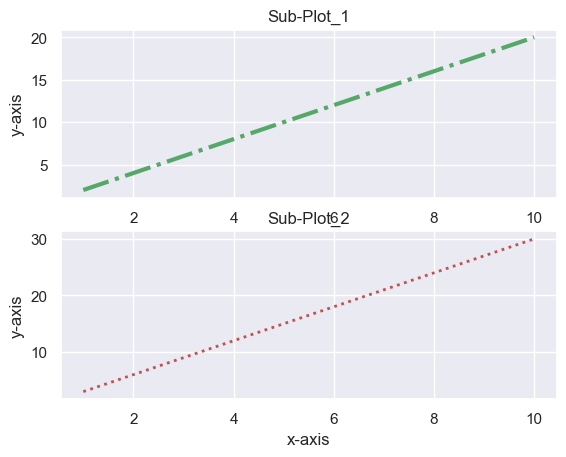

In [53]:
plt.subplot(2,1,1)
plt.plot(x, y1, color = "g", linestyle = "-.", linewidth = 3)
plt.title("Sub-Plot_1")
plt.xlabel("x-axis")
plt.ylabel("y-axis")


plt.subplot(2,1,2)
plt.plot(x, y2, color = "r" , linestyle = ":", linewidth = 2)
plt.title("Sub-Plot_2")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

## Scatter plot

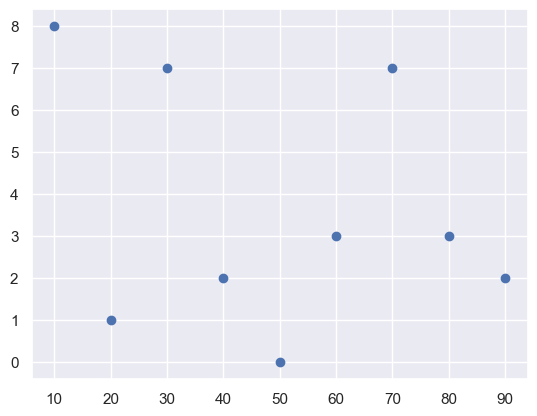

In [54]:
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
a = [8, 1, 7, 2, 0, 3, 7, 3, 2]

plt.scatter(x, a)
plt.show()

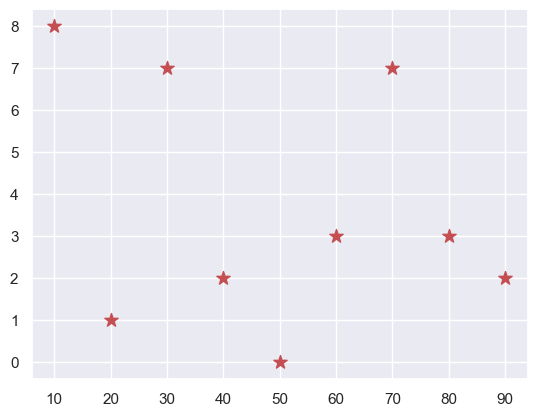

In [55]:
plt.scatter(x, a, marker = "*", c = "r", s = 100)
plt.show()

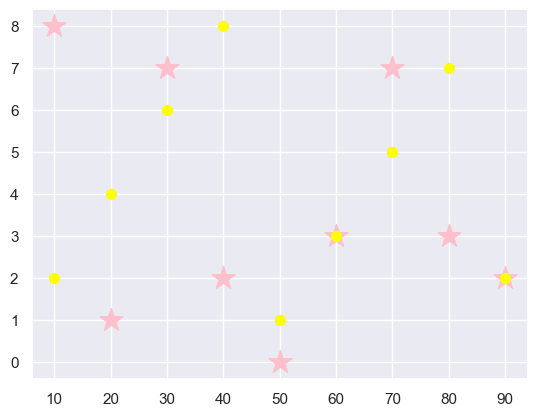

In [65]:
# x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# a = [8, 1, 7, 2, 0, 3, 7, 3, 2]
b = [2, 4, 6, 8, 1, 3, 5, 7, 2]
plt.scatter(x, a, marker = "*", c = "pink", s = 300)
plt.scatter(x, b, marker = ".", c = "yellow", s = 200)
plt.show()

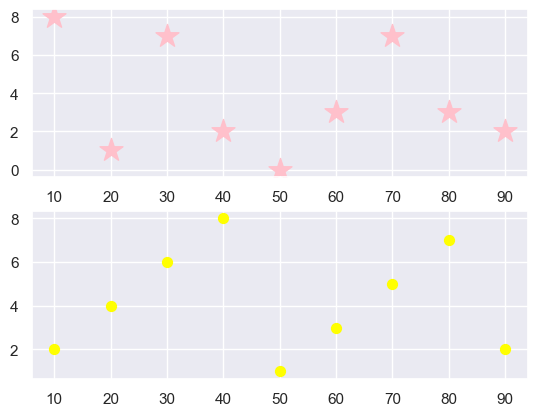

In [67]:
x = [10, 20, 30, 40, 50, 60, 70, 80, 90]
a = [8, 1, 7, 2, 0, 3, 7, 3, 2]
b = [2, 4, 6, 8, 1, 3, 5, 7, 2]
plt.subplot(2,1,1)
plt.scatter(x, a, marker = "*", c = "pink", s = 300)

plt.subplot(2, 1, 2)
plt.scatter(x, b, marker = ".", c = "yellow", s = 200)
plt.show()

# barplot 

In [68]:
student = {"bob" : 87, "Matt" : 56, "Sam" : 27 }

In [69]:
names = list(student.keys())
values = list(student.values())

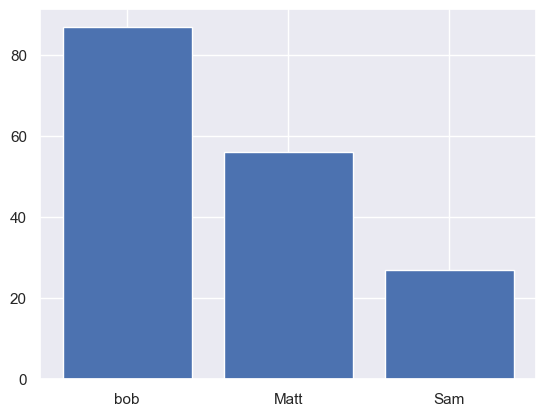

In [70]:
plt.bar(names, values)
plt.show()

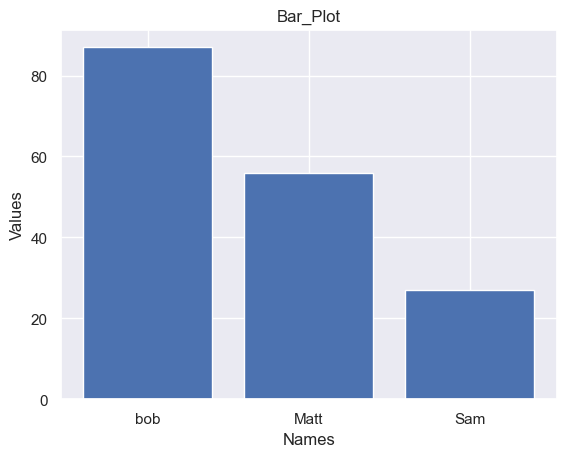

In [72]:
student = {"bob" : 87, "Matt" : 56, "Sam" : 27 }
names = list(student.keys())
values = list(student.values())
plt.bar(names, values)
plt.title("Bar_Plot")
plt.xlabel("Names")
plt.ylabel("Values")
plt.grid(True)
plt.show()

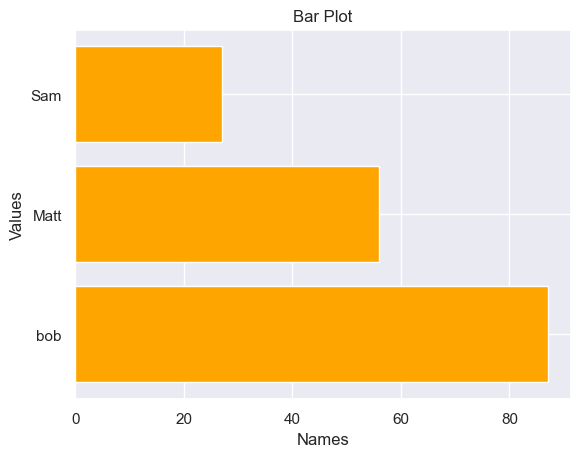

In [75]:
plt.barh(names, values, color = "Orange")
plt.title("Bar Plot")
plt.xlabel("Names")
plt.ylabel("Values")
plt.grid(True)
plt.show()

## Histogram(Univarition plot)

So for this purpose we are going to use a histogram which helps us to understand:
the distribution of a numeric column.
The difference between the barplot and the histogram is very simple, but people mostly get confused between these two.
A bar plot is used to understand the distribution of categorical column,  
While Histogram is used to understand the distribution of numerical or continious columns 

So all we are doing here is creating a list. 

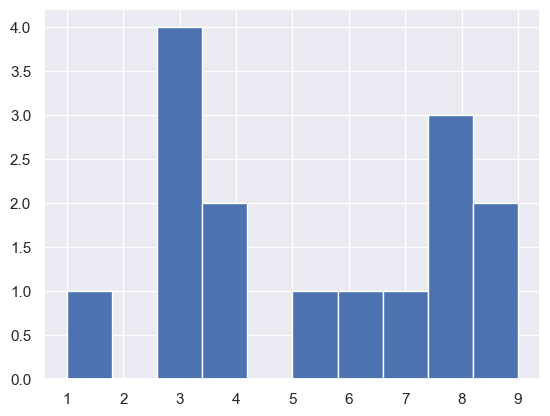

In [76]:
data = [1,3,3,3,3,9,9,5,4,4,8,8,8,6,7]
plt.hist(data)
plt.show()

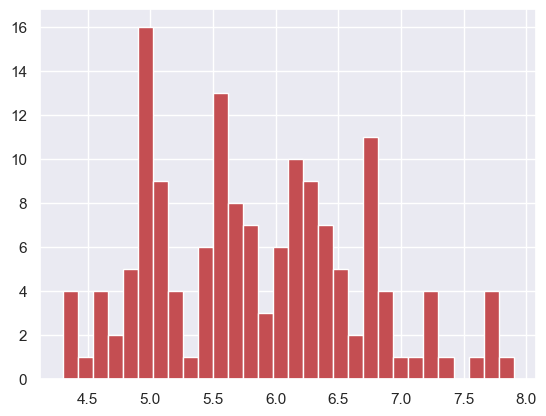

In [79]:
iris = pd.read_csv('Iris.csv')
iris.head()
plt.hist(iris['SepalLengthCm'], bins = 30, color = "r")
plt.show()

In [78]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


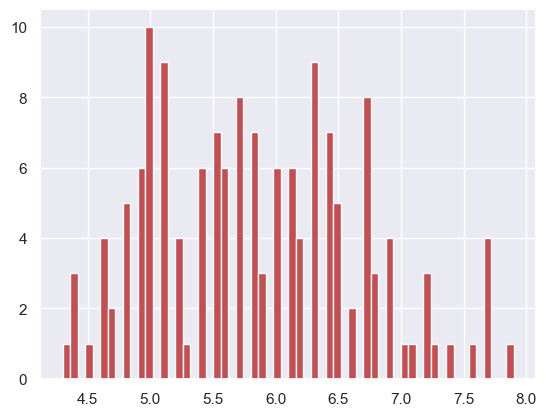

In [80]:
iris = pd.read_csv('Iris.csv')
iris.head()
plt.hist(iris['SepalLengthCm'], bins = 60, color = "r")
plt.show()

## bins in histogram 

A histogram displays numerical data by grouping data into "bins" of equal width.

Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. 

Bins are also sometimes called "intervals", "classes", or "buckets".

# boxplot

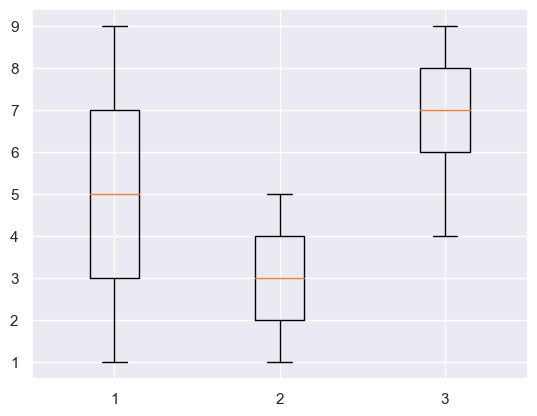

In [81]:
one = [1, 2, 3, 4, 5, 6, 7, 8, 9]
two = [1, 2, 3, 4, 5, 4, 3, 2, 1]
three = [6, 7, 8, 9, 8, 7, 6, 5, 4]

data = list([one, two, three])

plt.boxplot(data)
plt.show()

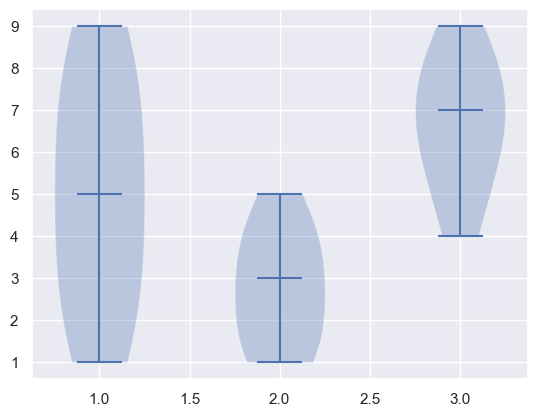

In [84]:
# Violin plot

plt.violinplot(data, showmedians = True)
plt.show()

## Pie chart and Doughnut Chart

In [85]:
fruit = ["Apple", "Orange", "Mango", "Guava"]
quantity = [67, 34, 100, 29]

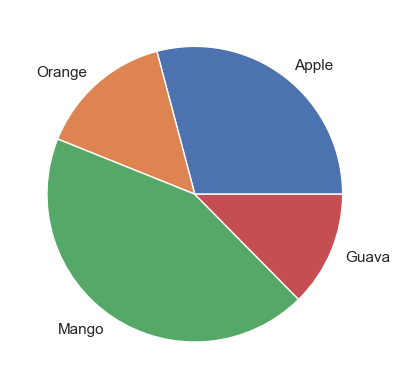

In [88]:
plt.pie(quantity, labels = fruit)
plt.show()

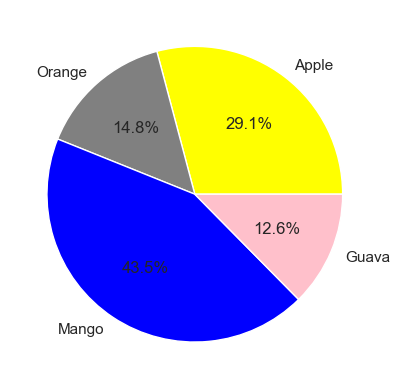

In [89]:
plt.pie(quantity, labels = fruit, autopct = "%0.1f%%", colors = ["yellow", "grey", "blue", "pink"] )
plt.show()

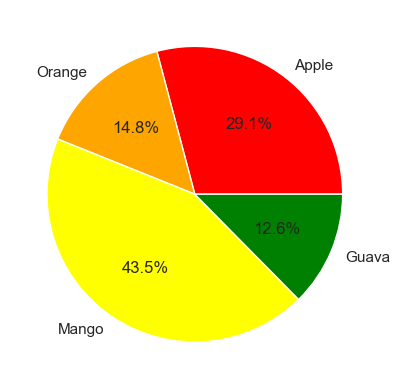

In [90]:
plt.pie(quantity, labels = fruit, autopct = "%0.1f%%", colors = ["red", "orange", "yellow", "green"] )
plt.show()

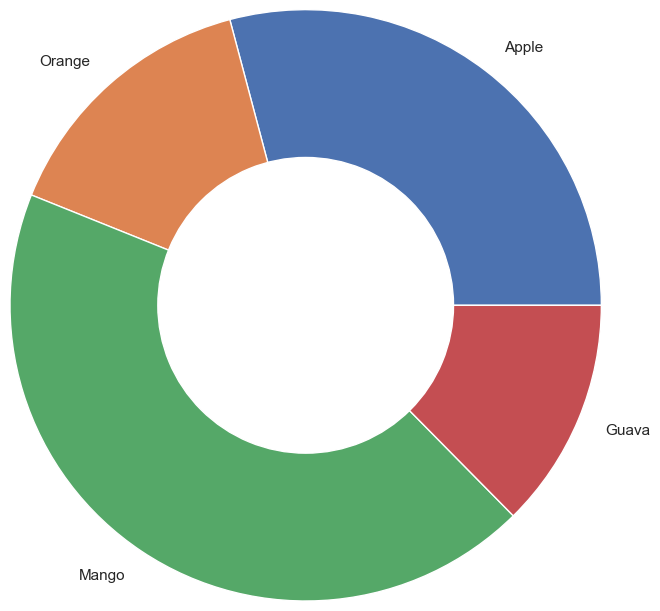

In [92]:
plt.pie(quantity, labels = fruit, radius = 2)
plt.pie([1], colors = ["w"], radius = 1)
plt.show()